# Import Library dan Load Data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
data = pd.read_csv("/content/drive/MyDrive/dataset/GOTO.JK.csv")

In [34]:
data

,Date,Close
0,4/11/2022,382
1,4/12/2022,370
2,4/13/2022,374
3,4/14/2022,376
4,4/18/2022,378
...,...,...
168,12/16/2022,96
169,12/19/2022,92
170,12/20/2022,87
171,12/21/2022,89


In [35]:
data.tail()

,Date,Close
168,12/16/2022,96
169,12/19/2022,92
170,12/20/2022,87
171,12/21/2022,89
172,12/22/2022,88


# Eksplorasi Data

In [36]:
type(data)

pandas.core.frame.DataFrame

In [37]:
data.isnull().sum()/len(data)

Date     0.0
Close    0.0
dtype: float64

In [38]:
data

,Date,Close
0,4/11/2022,382
1,4/12/2022,370
2,4/13/2022,374
3,4/14/2022,376
4,4/18/2022,378
...,...,...
168,12/16/2022,96
169,12/19/2022,92
170,12/20/2022,87
171,12/21/2022,89


In [39]:
#Mengubah tanggal menjadi index
con = data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14',
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-22', '2022-04-25',
               ...
               '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22'],
              dtype='datetime64[ns]', name='Date', length=173, freq=None)

In [40]:
data

,Close
Date,
2022-04-11,382
2022-04-12,370
2022-04-13,374
2022-04-14,376
2022-04-18,378
...,...
2022-12-16,96
2022-12-19,92
2022-12-20,87


In [41]:
#Menginisialkan variabel Close sebagai data time series
ts = data['Close']
ts.head(10)

Date
2022-04-11    382
2022-04-12    370
2022-04-13    374
2022-04-14    376
2022-04-18    378
2022-04-19    358
2022-04-20    338
2022-04-21    340
2022-04-22    340
2022-04-25    328
Name: Close, dtype: int64

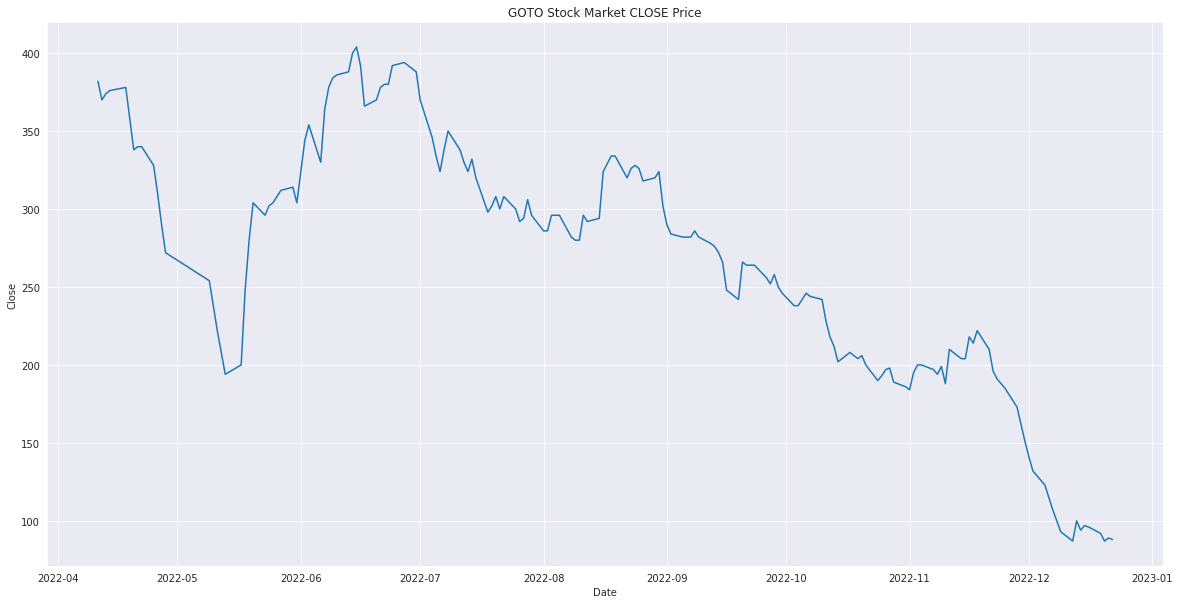

In [42]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('GOTO Stock Market CLOSE Price')
plt.plot(data['Close'])

## Uji Stasioneritas Data

In [43]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Uji Hipotesis:

H0 : Data tidak stasioner

Ha : Data stasioner

Tolak H0 apabila diperoleh p-value < alpha (0,05)

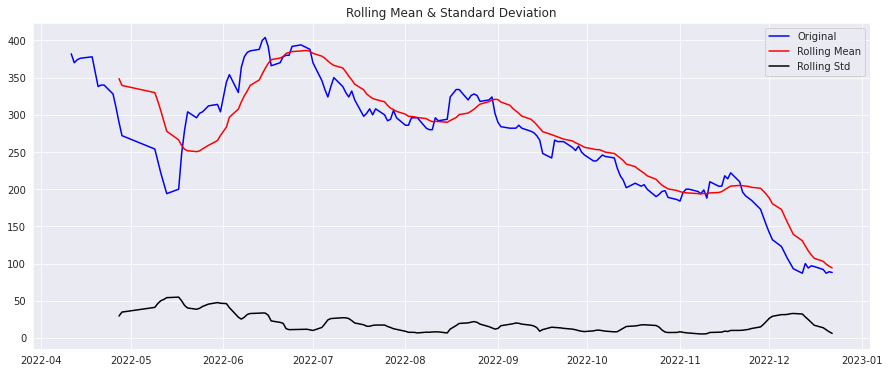

Results of Dickey-Fuller Test:
Test Statistic                  -0.561245
p-value                          0.879501
#Lags Used                       1.000000
Number of Observations Used    171.000000
Critical Value (1%)             -3.469181
Critical Value (5%)             -2.878595
Critical Value (10%)            -2.575863
dtype: float64


In [44]:
#Melakukan uji stasioneritas untuk dataset
test_stationarity(ts)

Diperoleh nilai p-value > 0,05, maka H0 tidak ditolak.

Jadi, data memiliki keadaan yang tidak stasioner.

Karena data belum stasioner, sehingga perlu dilakukan proses stasionerisasi data, yakni dengan proses differencing untuk memperoleh data yang stasioner.

# Diferencing 1


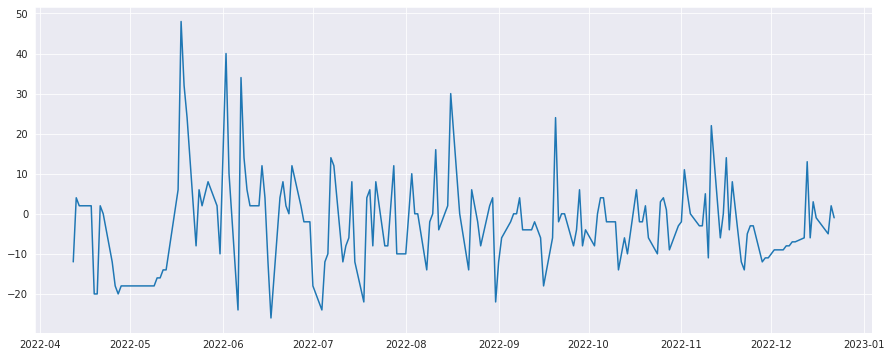

In [45]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

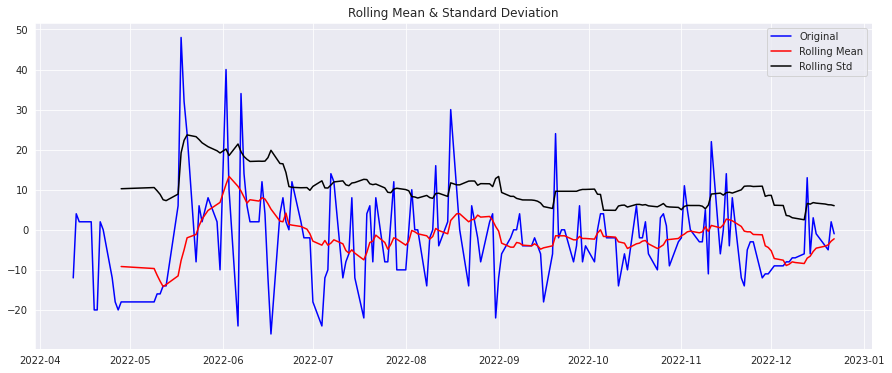

Results of Dickey-Fuller Test:
Test Statistic                -9.794025e+00
p-value                        6.243421e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.710000e+02
Critical Value (1%)           -3.469181e+00
Critical Value (5%)           -2.878595e+00
Critical Value (10%)          -2.575863e+00
dtype: float64


In [46]:
test_stationarity(ts_diff_1)

Setelah dilakukan proses differencing dan diuji stasioneritas data (setelah differencing), diperoleh data setelah differencing 1x telah membentuk data yang stasioner.

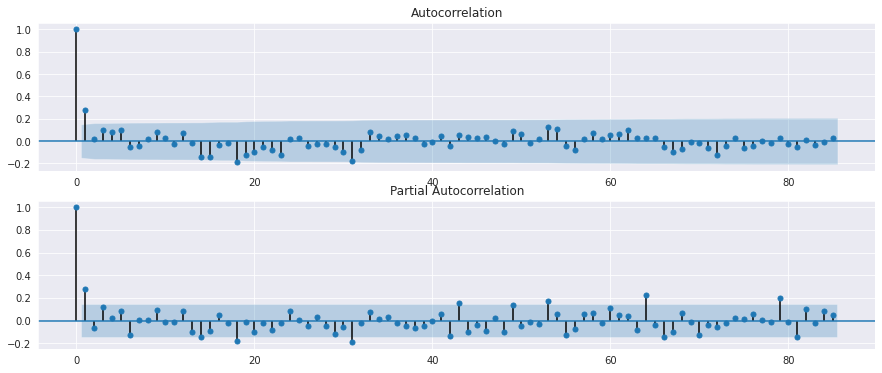

In [47]:
plt.figure()
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=85)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=85)
plt.show()

Plot ACF dan plot PACF dibentuk untuk mengetahui orde dari AR dan MA, sehingga bisa diketahui model yang sesuai untuk data.

In [48]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [49]:
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=127.173
ARIMA(0, 0, 1) RMSE=65.708
ARIMA(0, 1, 0) RMSE=7.487
ARIMA(0, 1, 1) RMSE=7.974
ARIMA(1, 0, 0) RMSE=8.362
ARIMA(1, 0, 1) RMSE=8.778
ARIMA(1, 1, 0) RMSE=7.618
ARIMA(1, 1, 1) RMSE=8.029
Best ARIMA(0, 1, 0) RMSE=7.487


Setelah dilakukan percobaan dengan model ARIMA(p,d,q) dengan:

- orde p = 0 dan 1
- orde d = 0 dan 1
- orde q = 0 dan 1

Diperoleh model yang menghasilkan RMSE terkecil adalah model ARIMA (1,1,1).

Hal ini sesuai dengan plot ACF dan PACF yang dies down setelah lag ke-1 dan dataset telah mengalami 1x proses differencing.

In [55]:
#Informasi yang diperoleh dari pemodelan ARIMA(0,1,0) pada dataset
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  172
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -662.748
Method:                           css   S.D. of innovations             11.407
Date:                Fri, 23 Dec 2022   AIC                           1329.496
Time:                        15:31:30   BIC                           1335.791
Sample:                             1   HQIC                          1332.050
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7093      0.870     -1.965      0.049      -3.414      -0.005
==============================================================================
"""

# Prediksi Data

In [57]:
#Prediksi data dengan model ARIMA(0,1,0) untuk 7 hari ke depan
predict_dif = results_ARIMA.predict(start=173,end=179)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict)

172    86.290698
173    82.872093
174    77.744186
175    70.906977
176    62.360465
177    52.104651
178    40.139535
dtype: float64


Diperoleh hasil prediksi untuk Close nilai saham GOTO pada periode tanggal :
- 23 Desember 2022 = 86.290698
- 24 Desember 2022 = 82.872093
- 25 Desember 2022 = 77.744186
- 26 Desember 2022 = 70.906977
- 27 Desember 2022 = 62.360465
- 28 Desember 2022 = 52.104651
- 29 Desember ::2022 = 40.139535